<a href="https://colab.research.google.com/github/AndrejHorvat1/Otkrivanje-prijevara-u-karticnim-transakcijama/blob/main/OtkrivanjePrevaraUKarti%C4%8DnimTransakcijama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT POTREBNIH BIBLIOTEKA**

In [1]:
import sklearn
print(sklearn.__version__)

1.4.0


In [2]:
!pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold

import scipy.stats as stats

**UČITAVANJE PODATAKA**


In [5]:
data = pd.read_csv('creditcard.csv')

data.isnull().values.any()

False

In [6]:
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

**ANALIZA PODATAKA**

In [7]:
data[['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [8]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

<Axes: >

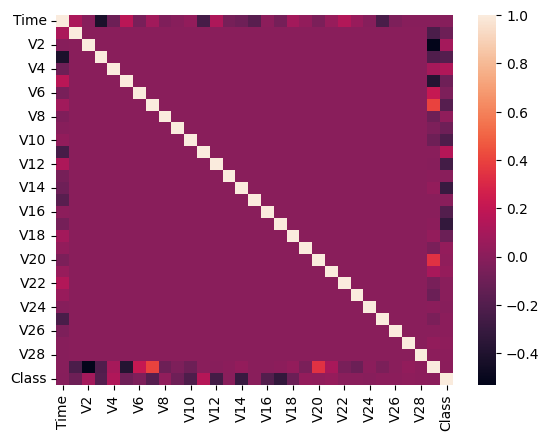

In [9]:
sns.heatmap(data.corr())

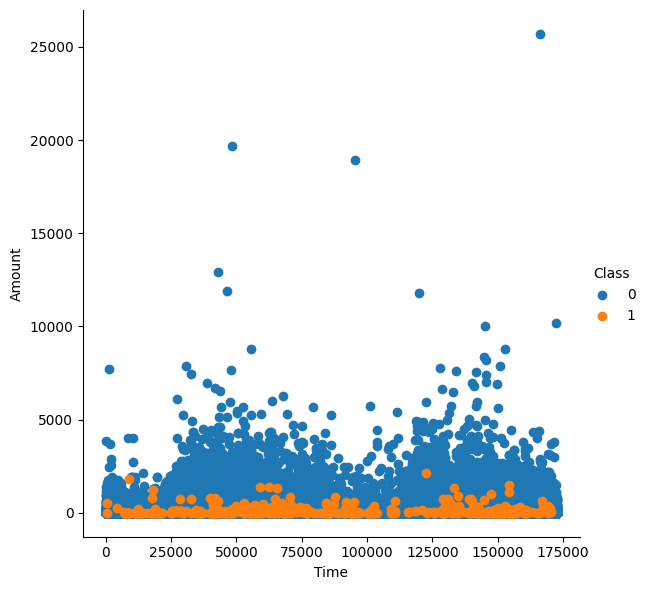

In [10]:
sns.FacetGrid(data, hue='Class', height=6).map(plt.scatter, 'Time', 'Amount').add_legend()
plt.show()


**PRIKAZ KLASA I BALANSIRANJE**

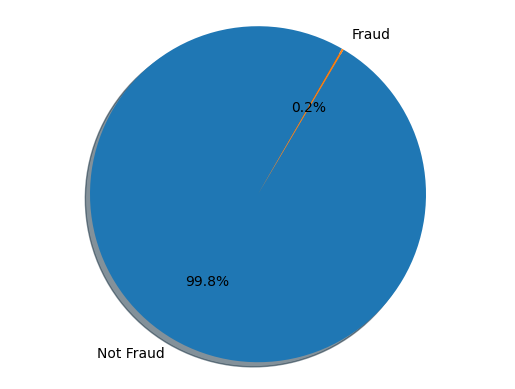

In [11]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data['Class'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

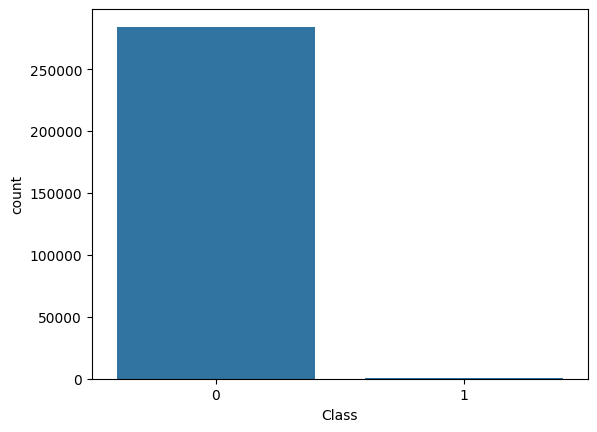

In [12]:
sns.countplot(x="Class",data=data)

**SKALIRANJE AMOUNT ZNAČAJKE**

In [13]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [14]:
data.drop(['Amount'], axis=1, inplace=True)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,0.927124
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,3.495006
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-0.307413
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.229162
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.770838
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,358.683155


In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


**PODJELA PODATAKA**

In [16]:
X = data.drop(columns = 'Class')
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)



print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  227845
Number transactions test dataset:  56962
Total number of transactions:  284807


**BALANSIRANJE PODATAKA KORIŠTENJEM SMOTE-A**

In [17]:
!pip install --upgrade scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [18]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X_train and y_train
# For example, X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create an instance of SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display information about the datasets
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)

# Display the distribution of label values before and after applying SMOTE
print('Distribution of label values before applying SMOTE:\n', pd.Series(y_train).value_counts())
print('Distribution of label values after applying SMOTE:\n', pd.Series(y_train_smote).value_counts())


Feature/label dataset for training before applying SMOTE:  (227845, 30) (227845,)
Feature/label dataset for training after applying SMOTE:  (454908, 30) (454908,)
Distribution of label values before applying SMOTE:
 0    227454
1       391
Name: Class, dtype: int64
Distribution of label values after applying SMOTE:
 0    227454
1    227454
Name: Class, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values before applying SMOTE:\n',pd.Series(y_train).value_counts())
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (227845, 30) (227845,)
Feature/label dataset for training after applying SMOTE:  (454908, 30) (454908,)
Distribution of label values before applying SMOTE:
 0    227454
1       391
Name: Class, dtype: int64
Distribution of label values after applying SMOTE:
 0    227454
1    227454
Name: Class, dtype: int64


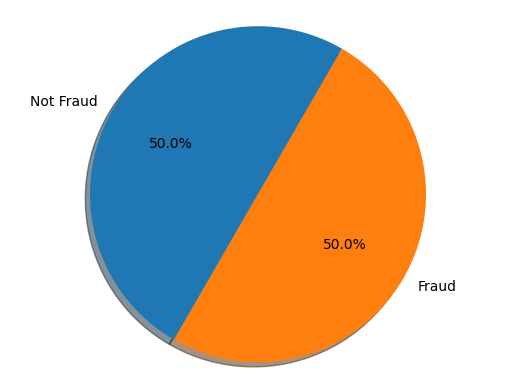

In [20]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_train_smote.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

**TRENING FUNKCIJE I FUNKCIJE ZA EVALUACIJU MODELA**

In [22]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [55]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def model(classifier, x_train, y_train, x_test, y_test):
    if isinstance(classifier, (LogisticRegression, DecisionTreeClassifier)):
        # Za logističku regresiju, stablo odlučivanja
        classifier.fit(x_train, y_train)
        prediction = classifier.predict(x_test)

        # Ispisujte gubitak i točnost
        print("Training Accuracy: {:.2%}".format(accuracy_score(y_train, classifier.predict(x_train))))
        print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, prediction)))

    elif isinstance(classifier, xgb.XGBClassifier):
        # Za XGBoost klasifikator
        eval_set = [(x_train, y_train), (x_test, y_test)]
        classifier.fit(x_train, y_train, eval_metric=["logloss", "error"], eval_set=eval_set, verbose=True)

        # Ispisujte točnost i gubitak iz XGBoost-a
        results = classifier.evals_result()
        training_loss = results['validation_0']['logloss']
        test_loss = results['validation_1']['logloss']
        training_accuracy = results['validation_0']['error']
        test_accuracy = results['validation_1']['error']

        epochs = range(len(training_loss))

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, training_loss, label='Training Loss')
        plt.plot(epochs, test_loss, label='Test Loss')
        plt.title('Loss over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, training_accuracy, label='Training Accuracy')
        plt.plot(epochs, test_accuracy, label='Test Accuracy')
        plt.title('Accuracy over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

    elif isinstance(classifier, CatBoostClassifier):
        # Za CatBoost klasifikator
        plot_catboost_loss(classifier, x_train, y_train, x_test, y_test)  # Dodano
        classifier.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=100)

    else:
        # Default za ostale klasifikatore
        classifier.fit(x_train, y_train)

    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    print("Cross Validation Score: {:.2%}".format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score: {:.2%}".format(roc_auc_score(y_test, prediction)))

    # Use RocCurveDisplay to plot ROC curve
    roc_display = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    roc_display.plot()

    plt.title('ROC_AUC_Plot')
    plt.show()
def model_evaluation(classifier, x_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    print(classification_report(y_test, classifier.predict(x_test)))


In [54]:
from catboost import cv, Pool
def plot_catboost_loss(classifier, x_train, y_train, x_test, y_test):
    if isinstance(classifier, CatBoostClassifier):
        # Stvori novi model s ažuriranim parametrima
        all_params = classifier.get_all_params()
        updated_classifier = CatBoostClassifier(iterations=all_params['iterations'],
                                                depth=all_params['depth'],
                                                learning_rate=all_params['learning_rate'],
                                                loss_function='Logloss')

        # Stvori Pool objekt iz trening podataka
        train_pool = Pool(x_train, label=y_train)

        # Koristi cv metodu za crtanje gubitka
        cv_data = cv(train_pool, updated_classifier.get_params())
        cv_data['Logloss_test_avg'] = cv_data['test-Logloss-mean']
        cv_data['Logloss_test_std'] = cv_data['test-Logloss-std']

        plt.errorbar(cv_data['iterations'], cv_data['Logloss_test_avg'], yerr=cv_data['Logloss_test_std'])
        plt.xlabel('Iterations')
        plt.ylabel('Logloss')
        plt.title('CatBoost Loss over iterations')
        plt.show()
    else:
        # Inače, nastavi s prethodnom logikom za crtanje gubitka
        classifier.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=100)
        results = classifier.get_evals_result()

        if 'validation_0' in results:
            training_loss = results['validation_0']['Logloss']
            test_loss = results['validation_1']['Logloss']
        else:
            training_loss = results['learn']['Logloss']
            test_loss = results['validation_set']['Logloss']

        iterations = range(len(training_loss))

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(iterations, training_loss, label='Training Loss')
        plt.plot(iterations, test_loss, label='Test Loss')
        plt.title('Loss over iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()



**LOGISTIČKA REGRESIJA**

In [28]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Training Accuracy: 97.16%
Test Accuracy: 98.31%
Cross Validation Score: 99.46%
ROC_AUC Score: 93.72%


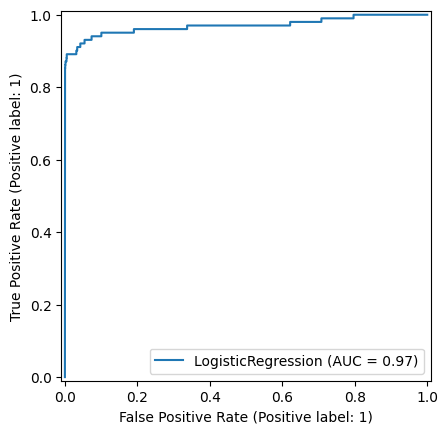

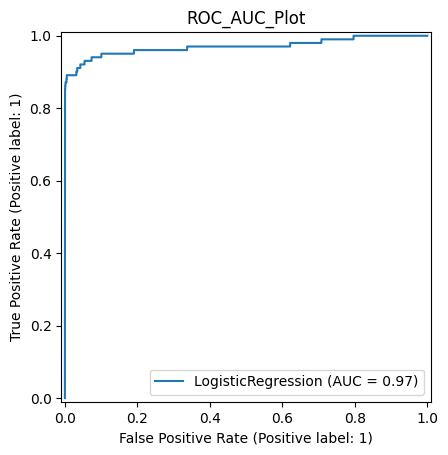

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.09      0.89      0.16       101

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



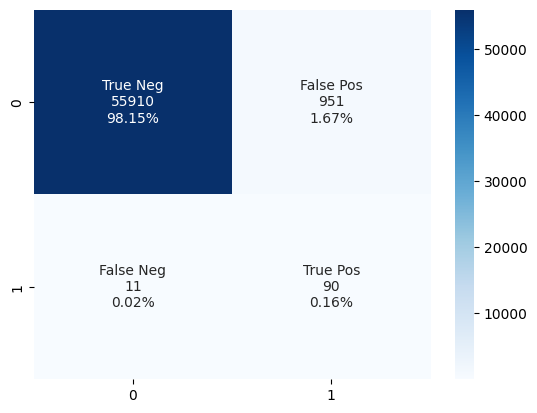

In [29]:
model(classifier_lr,X_train_smote,y_train_smote,X_test,y_test)
model_evaluation(classifier_lr,X_test,y_test)

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score: 98.73%
ROC_AUC Score: 93.69%


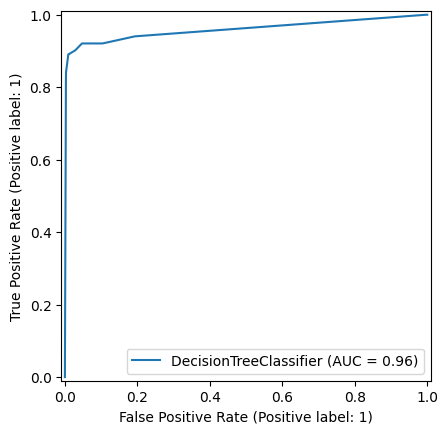

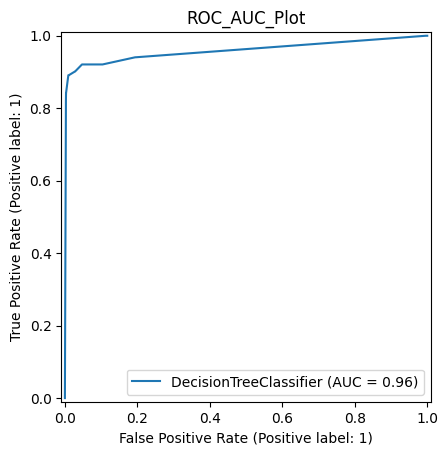

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.90      0.10       101

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962



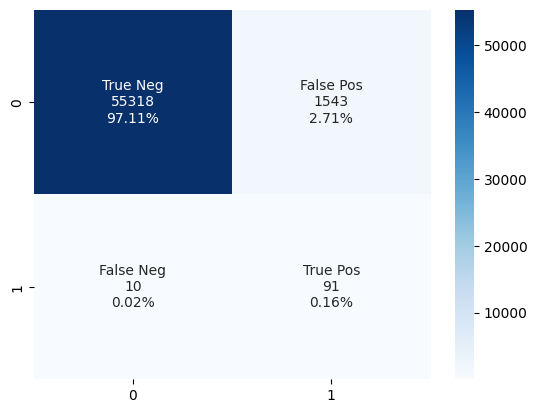

In [ ]:
model(classifier_dt,X_train_smote,y_train_smote,X_test,y_test)
model_evaluation(classifier_dt,X_test,y_test)

**XGBOOST CLASSIFIER**

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb_clf = XGBClassifier()

[0]	validation_0-logloss:0.45755	validation_0-error:0.02507	validation_1-logloss:0.45648	validation_1-error:0.01392
[1]	validation_0-logloss:0.32516	validation_0-error:0.02205	validation_1-logloss:0.32341	validation_1-error:0.00978
[2]	validation_0-logloss:0.23919	validation_0-error:0.01669	validation_1-logloss:0.23702	validation_1-error:0.01345
[3]	validation_0-logloss:0.18052	validation_0-error:0.01354	validation_1-logloss:0.17814	validation_1-error:0.00960
[4]	validation_0-logloss:0.13960	validation_0-error:0.01282	validation_1-logloss:0.13727	validation_1-error:0.00801
[5]	validation_0-logloss:0.10956	validation_0-error:0.01144	validation_1-logloss:0.10753	validation_1-error:0.00725
[6]	validation_0-logloss:0.08787	validation_0-error:0.01018	validation_1-logloss:0.08618	validation_1-error:0.00669
[7]	validation_0-logloss:0.07138	validation_0-error:0.00884	validation_1-logloss:0.07027	validation_1-error:0.00592
[8]	validation_0-logloss:0.05827	validation_0-error:0.00775	validation_1

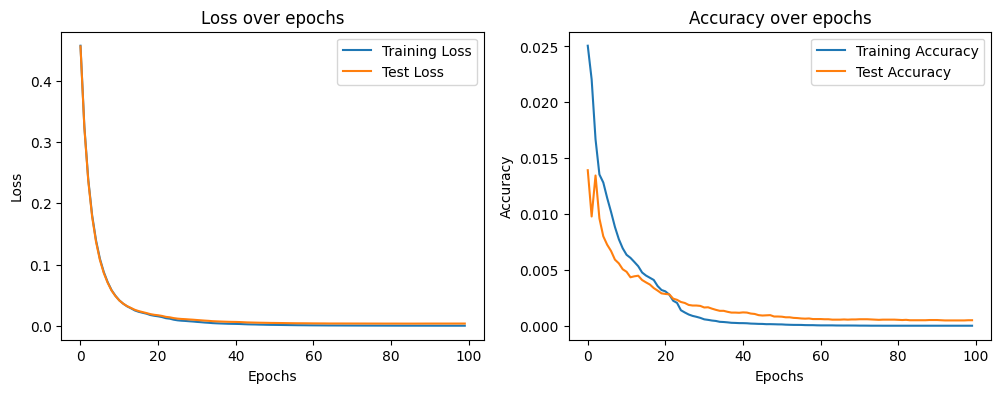

Cross Validation Score: 100.00%
ROC_AUC Score: 94.05%


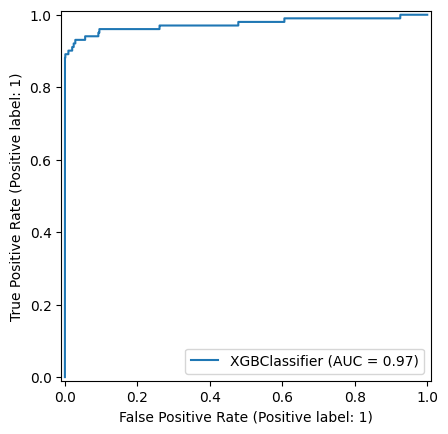

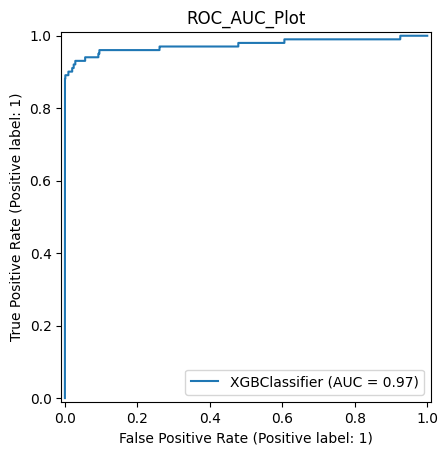

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.88      0.86       101

    accuracy                           1.00     56962
   macro avg       0.92      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962



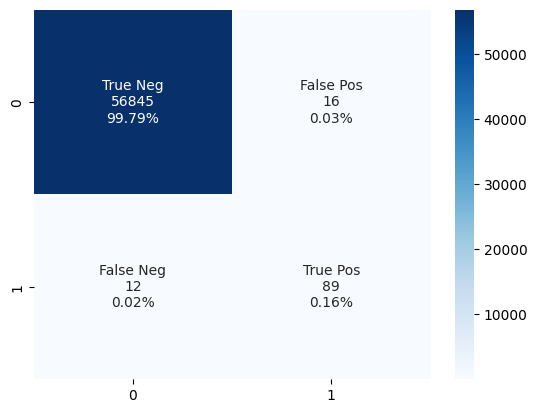

In [32]:
model(xgb_clf,X_train_smote,y_train_smote,X_test,y_test)
model_evaluation(xgb_clf,X_test,y_test)

**CATBOOST CLASSIFIER**

In [33]:
from catboost import CatBoostClassifier

In [34]:
catboost_clf = CatBoostClassifier()

Training on fold [0/3]
0:	learn: 0.4088189	test: 0.4085609	best: 0.4085609 (0)	total: 115ms	remaining: 1m 55s
1:	learn: 0.2625663	test: 0.2624468	best: 0.2624468 (1)	total: 217ms	remaining: 1m 48s
2:	learn: 0.1899029	test: 0.1894093	best: 0.1894093 (2)	total: 311ms	remaining: 1m 43s
3:	learn: 0.1477257	test: 0.1470293	best: 0.1470293 (3)	total: 418ms	remaining: 1m 44s
4:	learn: 0.1230603	test: 0.1222681	best: 0.1222681 (4)	total: 515ms	remaining: 1m 42s
5:	learn: 0.1063341	test: 0.1055261	best: 0.1055261 (5)	total: 615ms	remaining: 1m 41s
6:	learn: 0.0982337	test: 0.0974986	best: 0.0974986 (6)	total: 715ms	remaining: 1m 41s
7:	learn: 0.0870189	test: 0.0862349	best: 0.0862349 (7)	total: 821ms	remaining: 1m 41s
8:	learn: 0.0826817	test: 0.0819389	best: 0.0819389 (8)	total: 909ms	remaining: 1m 40s
9:	learn: 0.0774942	test: 0.0767801	best: 0.0767801 (9)	total: 1s	remaining: 1m 39s
10:	learn: 0.0715084	test: 0.0707059	best: 0.0707059 (10)	total: 1.12s	remaining: 1m 40s
11:	learn: 0.0677604	

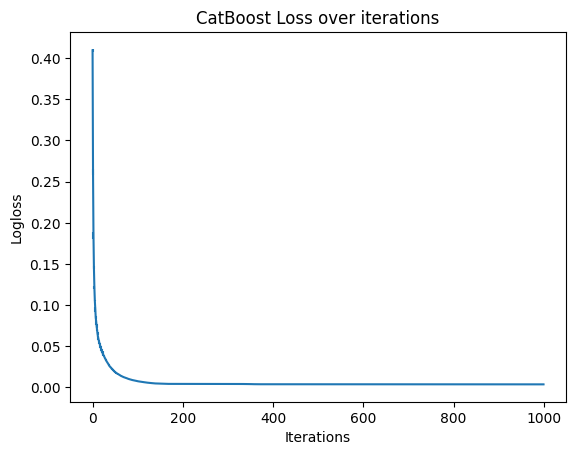

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
361:	learn: 0.0028487	total: 43.5s	remaining: 1m 16s
362:	learn: 0.0028487	total: 43.6s	remaining: 1m 16s
363:	learn: 0.0028487	total: 43.7s	remaining: 1m 16s
364:	learn: 0.0028487	total: 43.8s	remaining: 1m 16s
365:	learn: 0.0028487	total: 43.9s	remaining: 1m 15s
366:	learn: 0.0028486	total: 44s	remaining: 1m 15s
367:	learn: 0.0028486	total: 44.2s	remaining: 1m 15s
368:	learn: 0.0028486	total: 44.4s	remaining: 1m 15s
369:	learn: 0.0028486	total: 44.5s	remaining: 1m 15s
370:	learn: 0.0028486	total: 44.7s	remaining: 1m 15s
371:	learn: 0.0028486	total: 44.9s	remaining: 1m 15s
372:	learn: 0.0028486	total: 45.1s	remaining: 1m 15s
373:	learn: 0.0028486	total: 45.3s	remaining: 1m 15s
374:	learn: 0.0028486	total: 45.5s	remaining: 1m 15s
375:	learn: 0.0028486	total: 45.7s	remaining: 1m 15s
376:	learn: 0.0028486	total: 45.8s	remaining: 1m 15s
377:	learn: 0.0028486	total: 46s	remaining: 1m 15s
378:	learn: 0.0028486	total: 46.2s	rem

KeyboardInterrupt: 

In [56]:
model(catboost_clf,X_train_smote,y_train_smote,X_test,y_test)
model_evaluation(catboost_clf,X_test,y_test)

**NENADZIRANO UČENJE(autoenkoder)**

In [57]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [58]:
df = pd.read_csv("creditcard.csv")

In [59]:
df.shape

(284807, 31)

In [60]:
df.isnull().values.any()

False

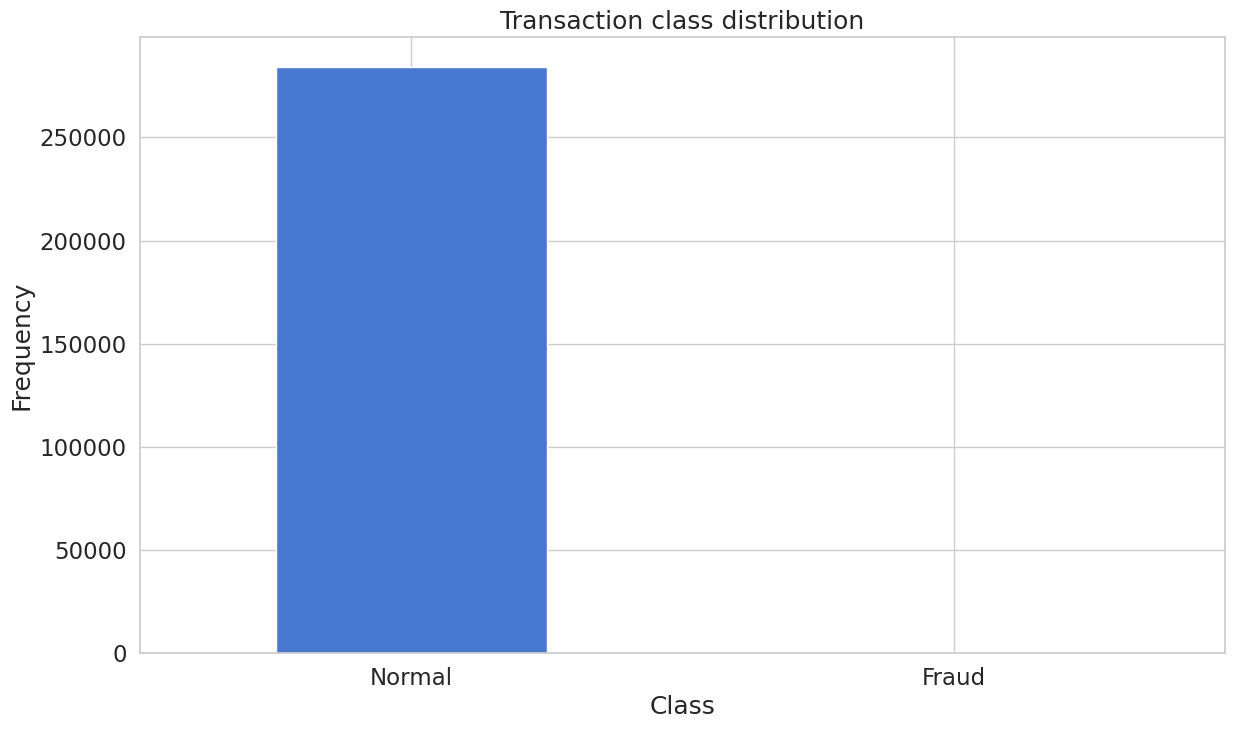

In [61]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [62]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(492, 31)

In [63]:
normal.shape

(284315, 31)

In [64]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [65]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

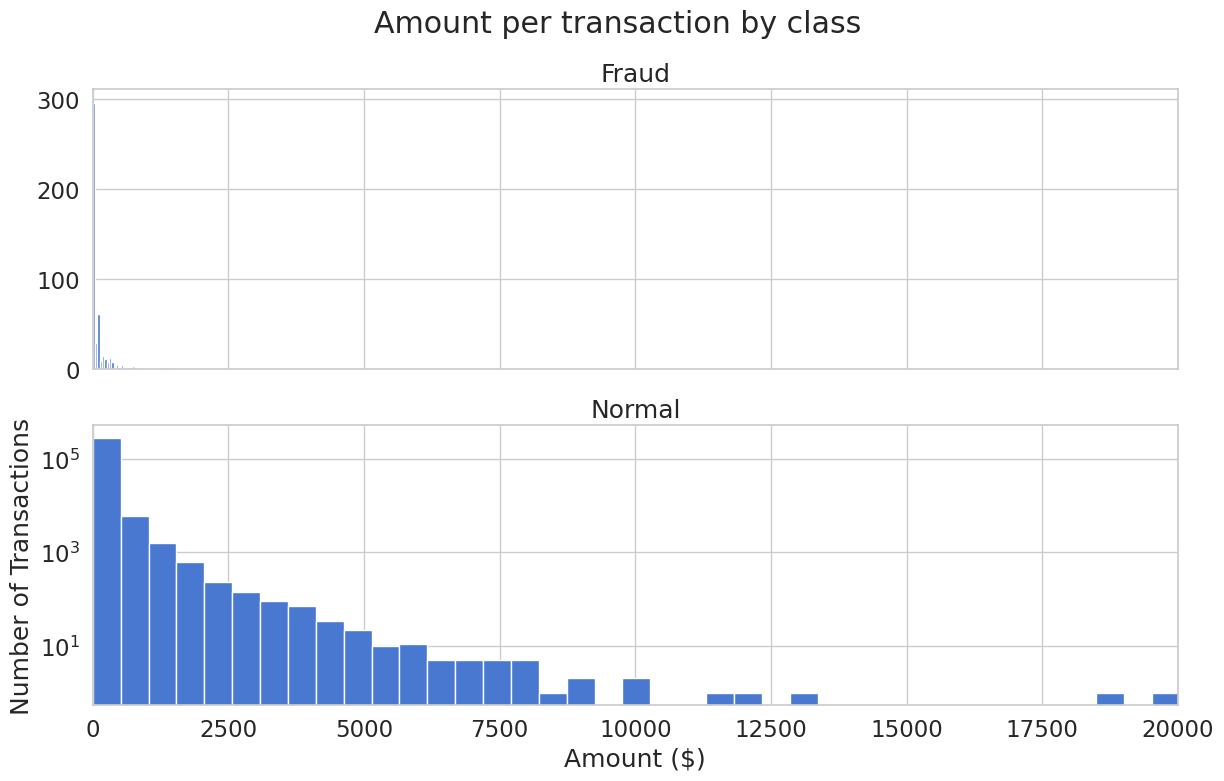

In [66]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

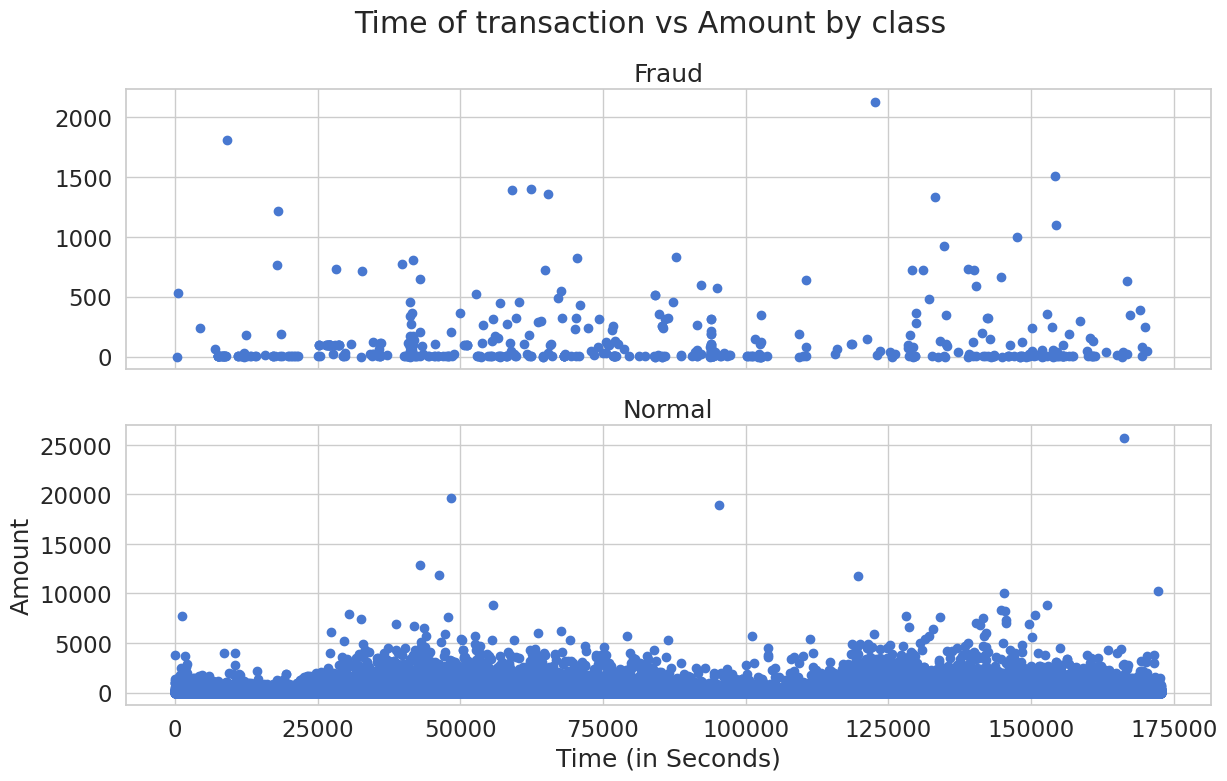

In [67]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
data1 = df.drop(['Time'], axis=1)
data1['Amount'] = StandardScaler().fit_transform(data1['Amount'].values.reshape(-1, 1))

In [80]:
X_train, X_test = train_test_split(data1, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 29)

In [81]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [82]:
nb_epoch = 20
batch_size = 32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/20
7108/7108 [==============================] - 20s 3ms/step - loss: 0.8149 - accuracy: 0.5737 - val_loss: 0.7856 - val_accuracy: 0.6368
Epoch 2/20
7108/7108 [==============================] - 18s 3ms/step - loss: 0.7410 - accuracy: 0.6638 - val_loss: 0.7625 - val_accuracy: 0.6748
Epoch 3/20
7108/7108 [==============================] - 19s 3ms/step - loss: 0.7296 - accuracy: 0.6813 - val_loss: 0.7582 - val_accuracy: 0.6868
Epoch 4/20
7108/7108 [==============================] - 18s 3ms/step - loss: 0.7249 - accuracy: 0.6871 - val_loss: 0.7543 - val_accuracy: 0.6894
Epoch 5/20
7108/7108 [==============================] - 19s 3ms/step - loss: 0.7219 - accuracy: 0.6913 - val_loss: 0.7510 - val_accuracy: 0.6938
Epoch 6/20
7108/7108 [==============================] - 19s 3ms/step - loss: 0.7198 - accuracy: 0.6938 - val_loss: 0.7502 - val_accuracy: 0.6945
Epoch 7/20
7108/7108 [==============================] - 19s 3ms/step - loss: 0.7182 - accuracy: 0.6955 - val_loss: 0.7500 - val_ac

In [83]:
autoencoder = load_model('model.h5')

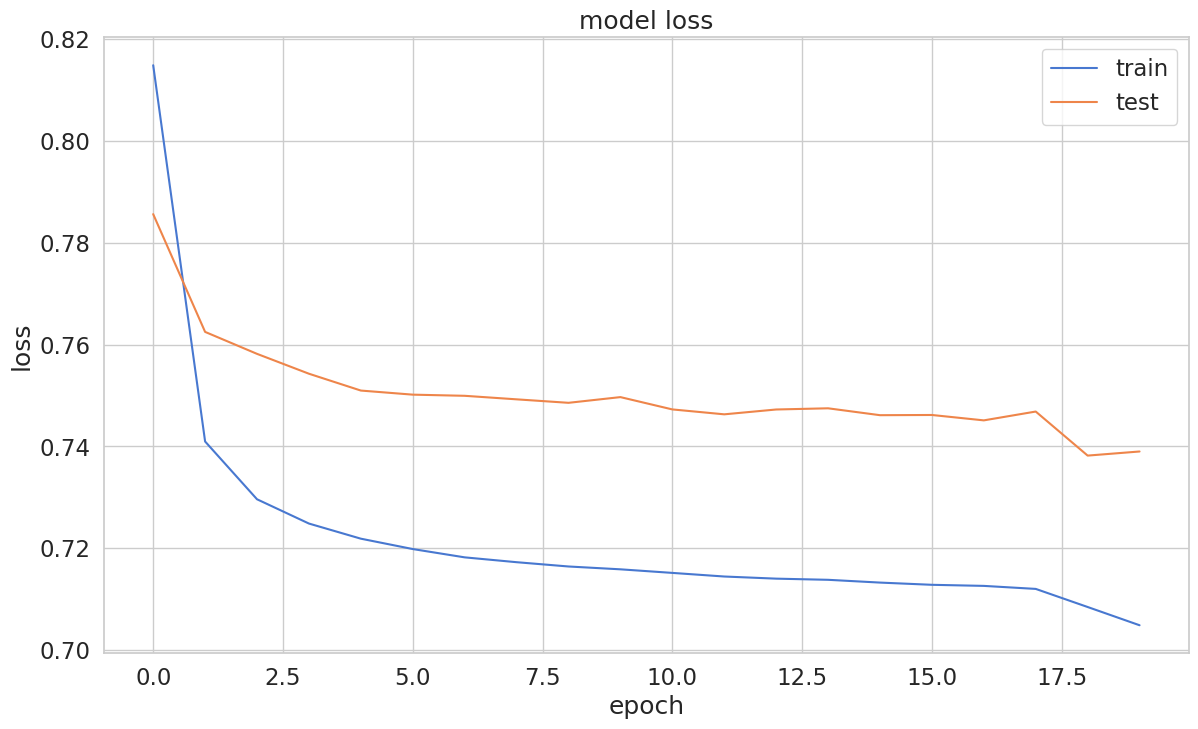

In [84]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [85]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 3s 2ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.737278,0.001720
std,3.443346,0.041443
min,0.045516,0.000000
25%,0.238655,0.000000
50%,0.383711,0.000000
75%,0.625201,0.000000
max,257.122400,1.000000


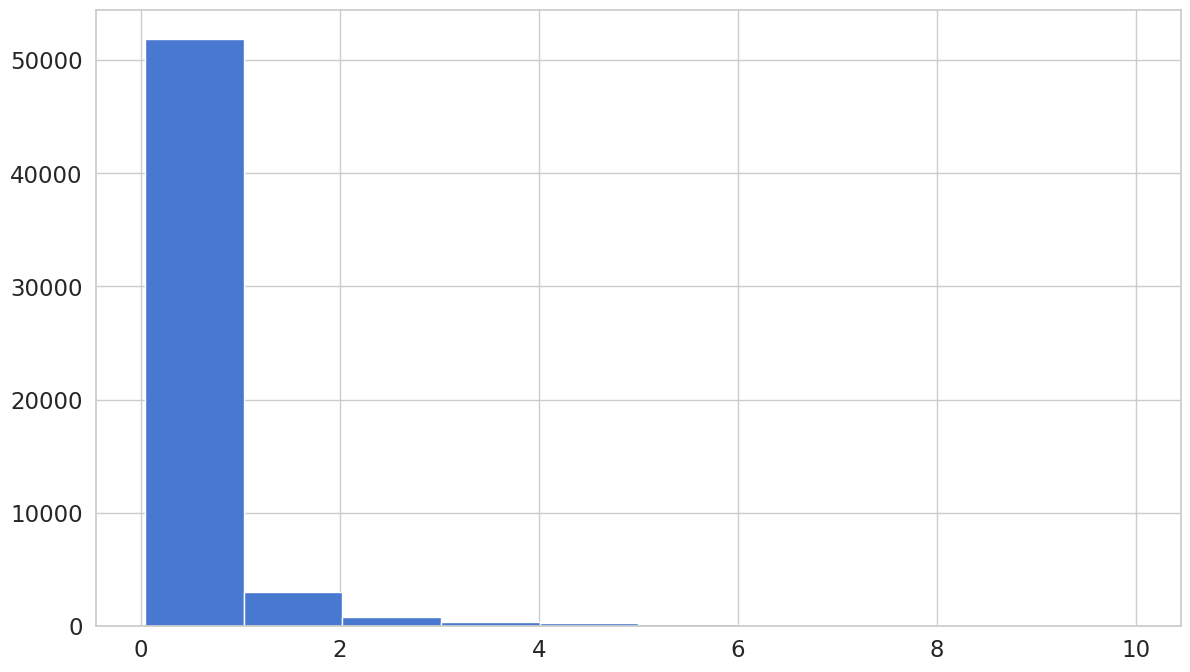

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

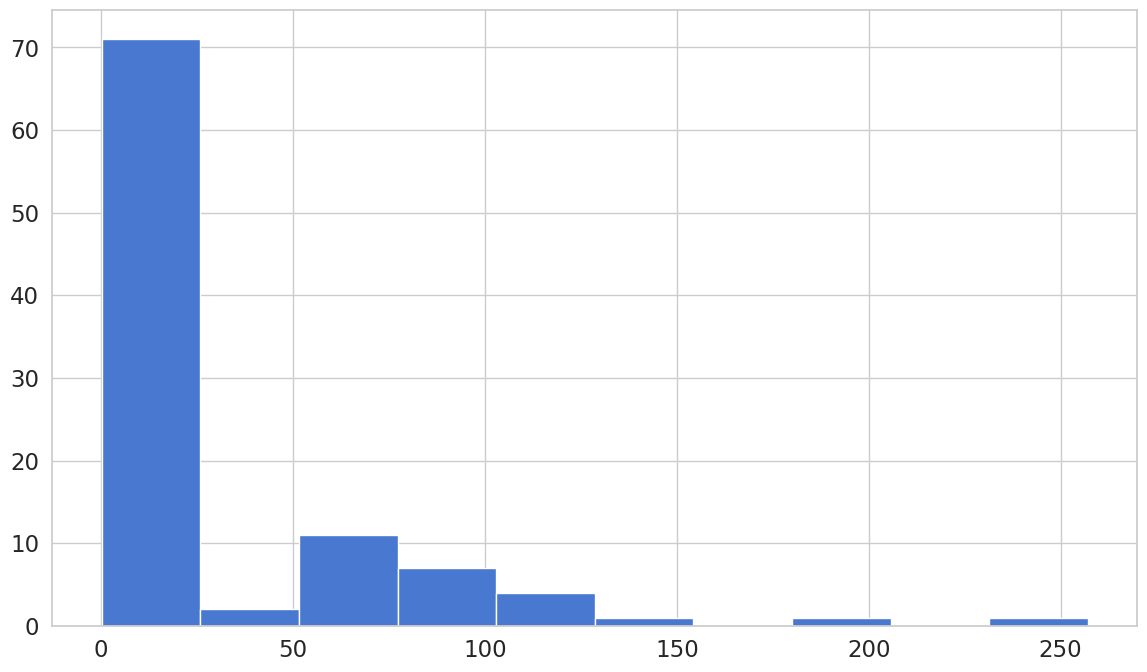

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [88]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

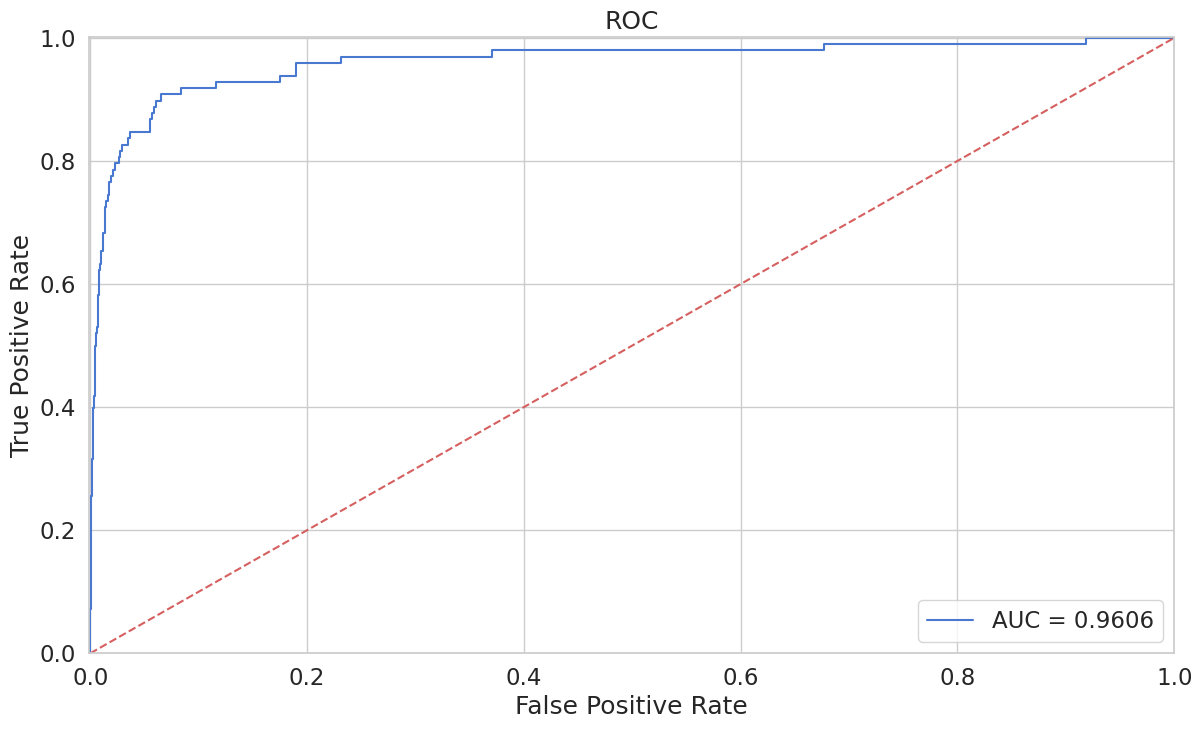

In [89]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

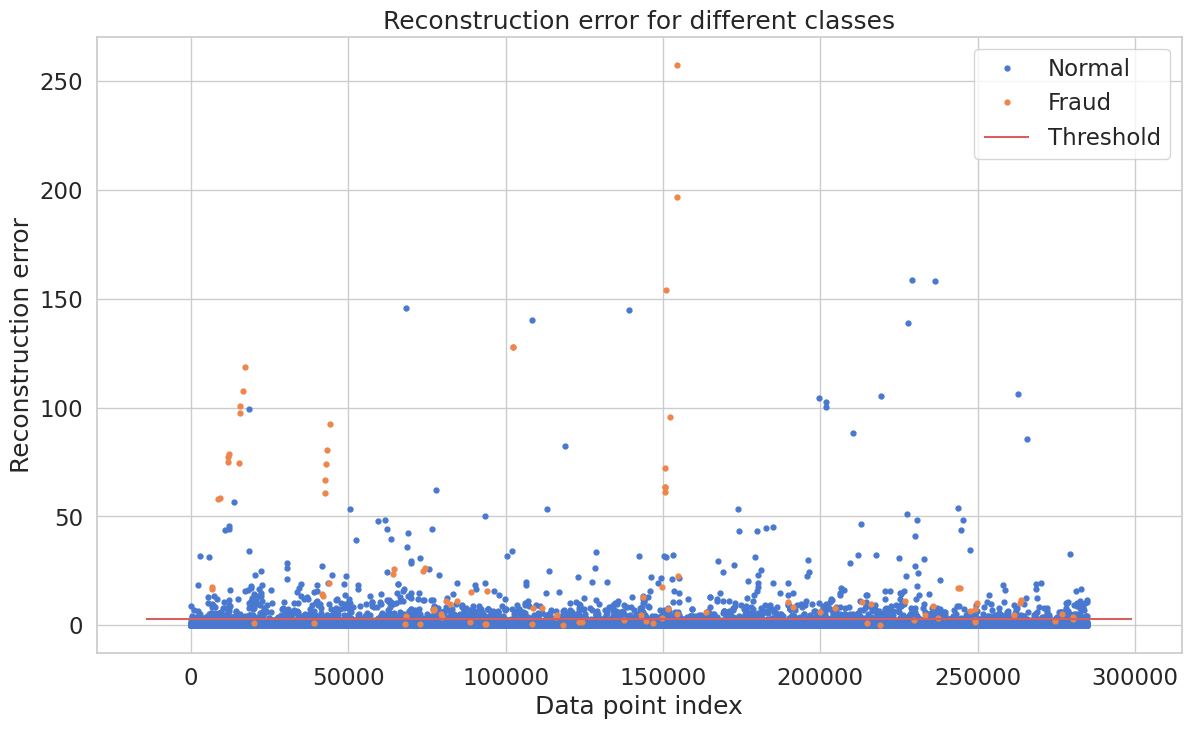

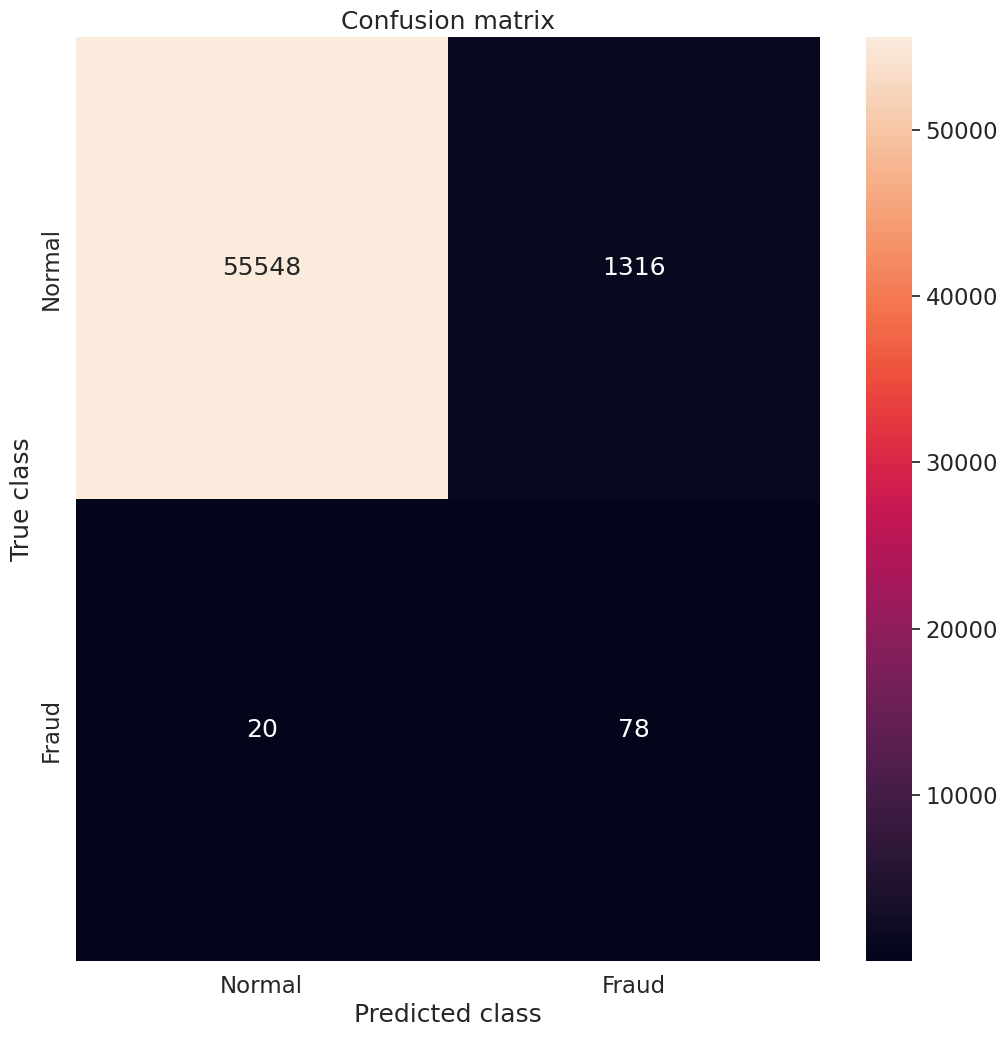

In [90]:
threshold = 2.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()